In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2021-05-09 05:53:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-05-09 05:54:00 (132 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [18]:
happy_face = os.path.join('/tmp/h-or-s/happy')

sad_face = os.path.join('/tmp/h-or-s/sad')

In [15]:
happy_face_names = os.listdir(happy_face)
print(f"file with happy faces: \n{happy_face_names[:5]}\n")

sad_face_names = os.listdir(sad_face)
print(f"file with sad faces: \n{sad_face_names[:5]}\n")

file with happy faces: 
['happy1-16.png', 'happy1-08.png', 'happy1-05.png', 'happy2-19.png', 'happy1-19.png']

file with sad faces: 
['sad1-14.png', 'sad2-13.png', 'sad2-17.png', 'sad2-12.png', 'sad1-05.png']



In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

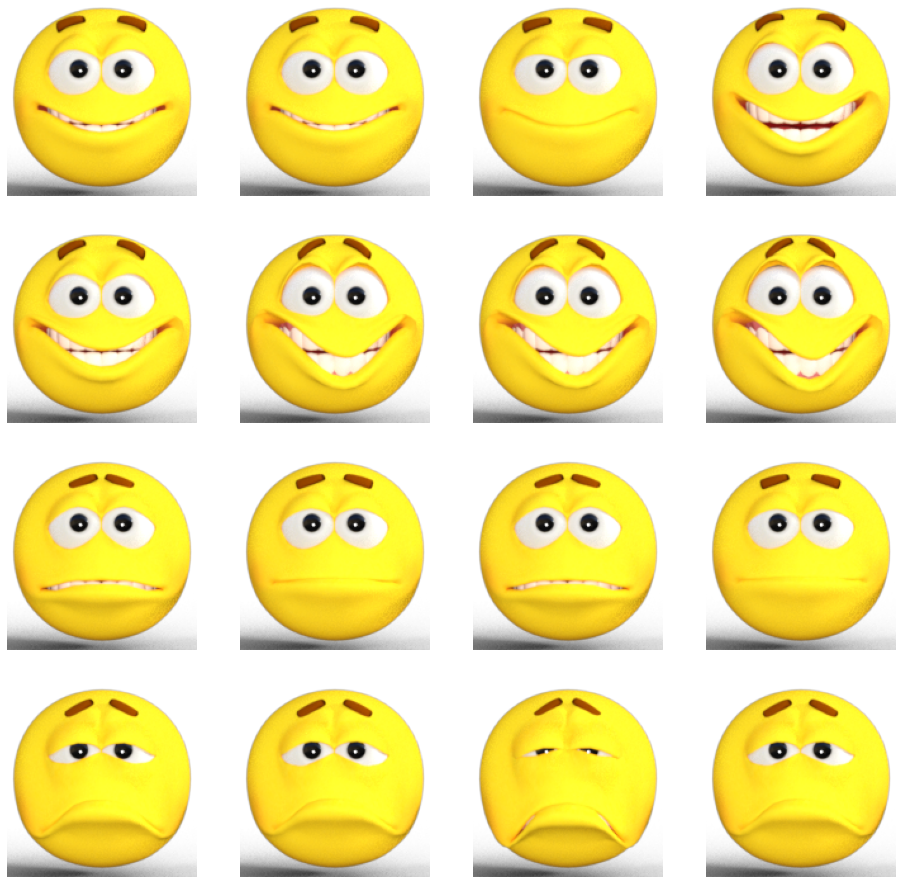

In [27]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happe_pix = [os.path.join(happy_face, fname) 
                for fname in happy_face_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_face, fname) 
                for fname in sad_face_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happe_pix+next_sad_pix):
  #print(img_path)
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [28]:
#callbacks

DESIRED_ACCURACY = 0.999

class CustomCallBacks(Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print("model reached 0.99 accuracy")
      self.model.stop_training = True

In [77]:
# This Code Block should Define and Compile the Model
model = Sequential()
#Layer 1
model.add(Conv2D(16, (3,3), input_shape =(150,150,3), activation= 'relu'))
model.add(MaxPool2D(2,2))
#Layer 2
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
#Layer 2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
#Dense layers
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
# using RMSPROP
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.00001), metrics = ['accuracy'])

In [78]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory



train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory= '/tmp/h-or-s/',
                                                    target_size = (150,150),
                                                    batch_size = 64,
                                                    class_mode ='binary')

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [79]:
# This code block should call model.fit and train for
# a number of epochs. 
call_backs = CustomCallBacks()
history = model.fit(train_generator, epochs=100, callbacks=[call_backs])
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/100
2/2 [==============================] - 3s 339ms/step - loss: 0.6902 - accuracy: 0.4948
Epoch 2/100
2/2 [==============================] - 2s 311ms/step - loss: 0.6795 - accuracy: 0.5052
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.6862 - accuracy: 0.6625
Epoch 4/100
2/2 [==============================] - 2s 302ms/step - loss: 0.6744 - accuracy: 0.5958
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.6699 - accuracy: 0.6917
Epoch 6/100
2/2 [==============================] - 2s 306ms/step - loss: 0.6663 - accuracy: 0.8885
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.6602 - accuracy: 0.8667
Epoch 8/100
2/2 [==============================] - 2s 304ms/step - loss: 0.6591 - accuracy: 0.8563
Epoch 9/100
2/2 [==============================] - 2s 1s/step - loss: 0.6558 - accuracy: 0.8667
Epoch 10/100
2/2 [==============================] - 2s 1s/step - loss: 0.6529 - accuracy: 0.8875
Epoch 11/100
2/2 [======

# Visualising Layers 

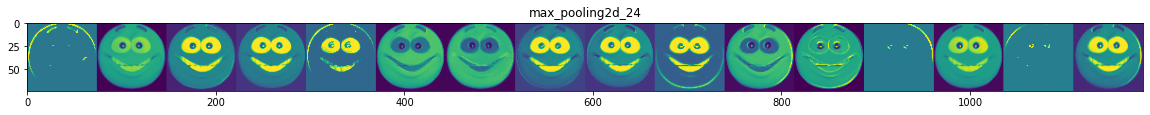

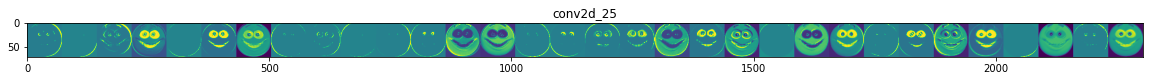

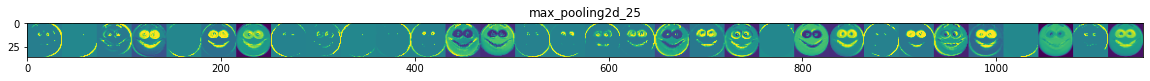

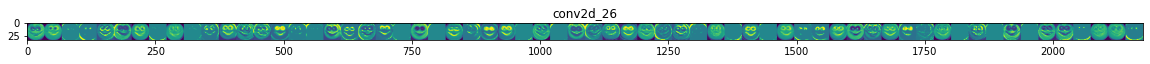

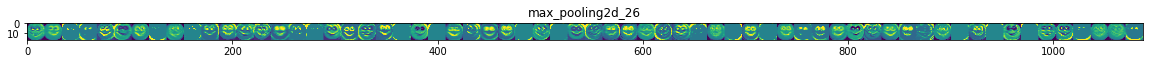

In [91]:
import random
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
happy_img_files = [os.path.join(happy_face, f) for f in happy_face_names]
sad_img_files = [os.path.join(sad_face, f) for f in sad_face_names]
img_path = random.choice(happy_img_files + sad_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
yo